In [17]:
import numpy as np

In [35]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\super\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip' command.


## 손실함수

### 오차제곱합

In [5]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

In [7]:
def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [9]:
y,t = np.array(y),np.array(t)
sum_squares_error(y,t)

0.09750000000000003

### 교차 엔트로피

In [10]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [11]:
cross_entropy_error(y,t)

0.510825457099338

### 미니배치 학습

In [20]:
from data.mnist import load_mnist

In [22]:
(x_train,t_train),(x_test,y_test) = load_mnist(normalize=True,one_hot_label=True)

In [25]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

## 배치 교차 엔트로피 오차

In [27]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t.np.log(y+1e-7))/batch_size

## 수치미분

In [43]:
def numerrical_diff(f,x):
    h = 1e-5
    return (f(x+h) - f(x-h))/(2*h)

In [34]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [36]:
import matplotlib.pylab as plt

Matplotlib is building the font cache; this may take a moment.


In [38]:
%matplotlib notebook

<IPython.core.display.Javascript object>


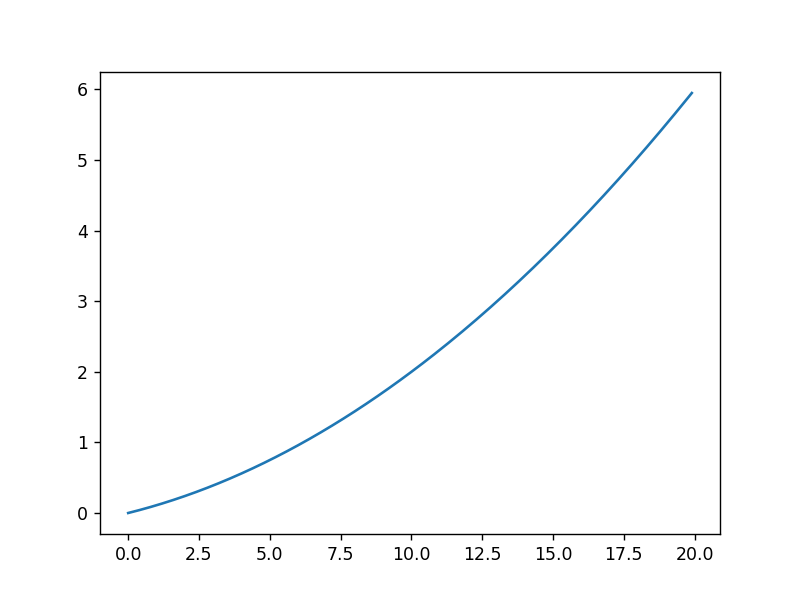

In [39]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.plot(x,y)

In [45]:
numerrical_diff(function_1,5)
numerrical_diff(function_1,10)

0.29999999997532

### 편미분

In [46]:
def function_2(x):
    return x[0]**2 + x[1]**2